In [23]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from tabulate import tabulate

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
#Set url and visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
Temperature_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 43.0MB/s]


In [3]:
#Convert table to DF
#First, Convert table as dictionary
table = Temperature_soup.find("table")
rows = table.find_all("tr",{'class':['data-row']})
header = table.find("tr").find_all('th')
'''
List = []
for row in rows:
    Dict = {}
    Dict[header[0].text] = row.find_all('td')[0].text
    Dict[header[1].text] = row.find_all('td')[1].text
    Dict[header[2].text] = row.find_all('td')[2].text
    Dict[header[3].text] = row.find_all('td')[3].text
    Dict[header[4].text] = row.find_all('td')[4].text
    Dict[header[5].text] = row.find_all('td')[5].text
    Dict[header[6].text] = row.find_all('td')[6].text
    List.append(Dict)
'''
List2 = []
for row in rows:
    Dict2 = {}
    counter = 0
    for cell in row.find_all('td'):
        Dict2[header[counter].text] = cell.text
        counter = counter+1
    List2.append(Dict2)

In [4]:
#Second, Convert dictionary as DF
import pandas as pd
df = pd.DataFrame.from_dict(List2)

In [5]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
#How many months exist on Mars? 
A:12
df.groupby(['month'])['month'].count()

month
1     174
10    112
11    138
12    166
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
Name: month, dtype: int64

In [26]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset? 
A:1867
df['sol'].astype(int).count()

1867

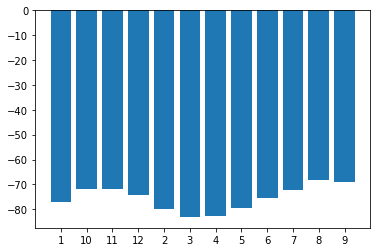

In [9]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
#A:The coldest month is 3, And warmest month is 8
import matplotlib.pyplot as plt
df['min_temp'] = df['min_temp'].astype(float)
data = df.groupby(['month'])['min_temp'].mean()
plt.bar(data.index,data)
plt.show()

In [10]:
print(data.max())
print(data.min())
print(data)

-68.38297872340425
-83.30729166666667
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


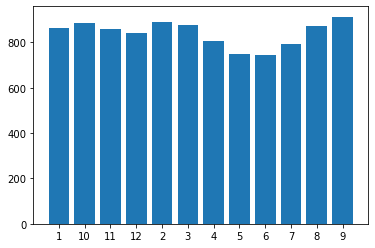

In [11]:
#Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
#A: The lowest atmospheric pressure month is 6, and the highest atmospheric pressure is 9
df['pressure'] = df['pressure'].astype(float)
data2 = df.groupby(['month'])['pressure'].mean()
plt.bar(data2.index,data2)
plt.show()

In [12]:
print(data2.max())
print(data2.min())
print(data2)

913.3059701492538
745.0544217687075
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


686 days 00:00:00


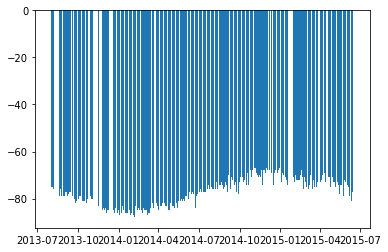

In [74]:
#About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
#A:686 days
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
startDf = df.loc[(df['month'] == '1')&(df['month'].shift(1) == '12')]
startD = startDf.at[startDf.head(1).index[0],'terrestrial_date']
endDf = df.loc[(df['month'] == '12')&(df['month'].shift(-1) == '1')]
endD = endDf.at[endDf.iloc[1:2].index[0],'terrestrial_date']

print(endD - startD)
df_estimate = df.loc[(df['terrestrial_date']>=startD) & (df['terrestrial_date']<=endD)]
plt.bar(df_estimate['terrestrial_date'],df_estimate['min_temp'])
plt.show()

In [76]:
browser.quit()

In [75]:
#Export to CSV
df.to_csv('mars_news.csv')